# Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing Data

In [2]:

application_train = pd.read_csv('data/application_train.csv')
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
bureau = pd.read_csv('data/bureau.csv')
application_test = pd.read_csv('data/application_test.csv')

# EDA

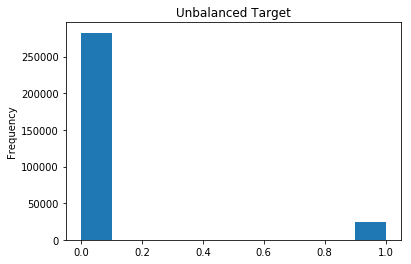

In [3]:

application_train.head()
#The target feature is really unbalanced..Should we try data augmentation?Why or why not?
#application_train.TARGET.value_counts(dropna=False)

#Humongous amount of features
#application_train.shape[1]

#application_train.isnull().sum().sort_values(ascending=False)
#application_train.nunique()
application_train['TARGET'].astype(int).plot.hist(title='Unbalanced Target')

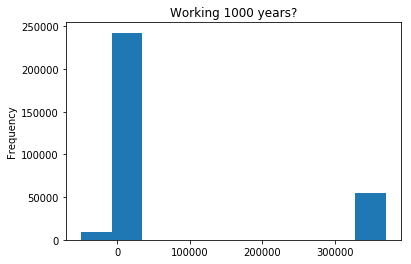

In [4]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Working 1000 years?',range = (-50000,370000))
#Maybe dummify by employed and unemployed?

C:\Users\Bernardo Fernandes\Anaconda3\envs\ldsa\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


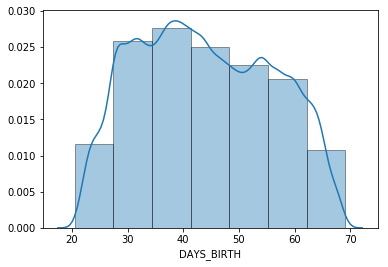

In [5]:

sns.distplot(abs(application_train['DAYS_BIRTH']) / 365,bins=7,hist_kws=dict(edgecolor="k", linewidth=1))

C:\Users\Bernardo Fernandes\Anaconda3\envs\ldsa\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of credit conceded')

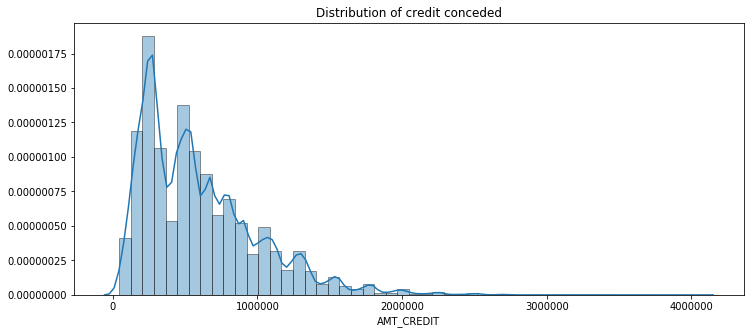

In [6]:
plt.figure(figsize=(12,5))
sns.distplot(application_train["AMT_CREDIT"],hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of credit conceded')

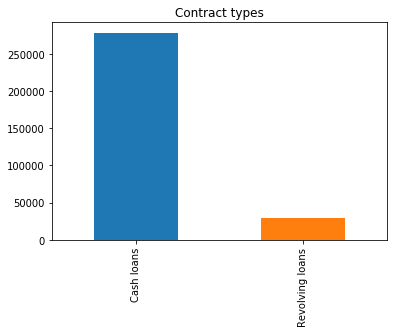

In [7]:
application_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar',title = 'Contract types')
#Most contract types are cash loans

In [8]:
POS_CASH_balance.head()

#Also more IDs than Train set but less than Train and test together
#POS_CASH_balance.SK_ID_CURR.nunique()

#More than 1 row per ID
#POS_CASH_balance.shape[0]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [9]:
bureau_balance.head()


#Right now SK_ID_BUREAU does not seem to have anything to do with SK_ID_CURR or_PREV
#bureau_balance[bureau_balance.SK_ID_BUREAU == 2448283]
#bureau_balance[bureau_balance.SK_ID_BUREAU == 226558]

#bureau_balance has more than one ID per row since it has monthly balance
#bureau_balance.shape[0]

#More IDs than train and test(inner join?)
#bureau_balance.SK_ID_BUREAU.nunique()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [10]:
installments_payments.head()

#More than train but less than train and test set
#installments_payments.SK_ID_CURR.nunique()

#2905 NaNs in DAYS_ENTRY_PAYMENT and AMT_PAYMENT 
#installments_payments.isnull().sum()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [11]:
credit_card_balance.head()

#Less than train IDs(possibly ignore?)
#credit_card_balance.SK_ID_CURR.nunique()

# ~300,000(4%) NaNs in CNT_INSTALMENT_MATURE_CUM and AMT_INST_MIN_REGULARITY
# ~750,000(20%) NaNs in AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,
#AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_OTHER_CURRENT and CNT_DRAWINGS_POS_CURRENT
#credit_card_balance.isnull().sum()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [12]:
bureau.head()

#OK now this df is key.Connects SK_ID_CURR to SK_ID_BUREAU
#There is also some info about the test set IDs so we have info about previous credits
#If we are gonna use this data, we need to be careful with currency

#Several rows for one ID
#bureau.SK_ID_CURR.nunique()

# ~600,000(33%) NaNs in DAYS_ENDDATE_FACT and AMT_CREDIT_SUM_LIMIT
# ~1,150,000(66%) NaNs in AMT_ANUUITY and AMT_CREDIT_MAX_OVERDUE(ignore?) 
#bureau.isnull().sum()


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [13]:
#Test set(same shape as application_train,well except for the target obviously)
application_test.head()

#We need to deal with NaNs in the test set was well
#application_test.isnull().sum()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data preprocessing

In [14]:
#Other matters we need to work on:

#How should we deal with the continuous variables?
#What should we do about SK_ID_PREV?
#Should our baseline include the least or most features possible

application_train.NAME_TYPE_SUITE.astype('object')
application_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [15]:
def fill_nanas(df):
    df_=df.copy()
    for col in df_.columns:
        if df_[col].isnull().sum()/len(df_) >= 0.3:
             df_.drop(col,axis=1,inplace=True)
        else:
            if df_[col].dtype=='object':
                df_[col].fillna(df_[col].mode(),inplace=True)
            else: 
                df_[col].fillna(df_[col].median(),inplace=True)
    return df_
                    
                
             
app_train = fill_nanas(application_train)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Only column with NaNs is NAME_TYPE_SUITE

app_train.NAME_TYPE_SUITE.fillna('Unknown',inplace=True)
#app_train.isnull().sum()
#app_train.NAME_TYPE_SUITE.value_counts(dropna=False)

In [17]:
def binning(df):
    df_=df.copy()
    for col in df_.columns[1:]:
        if df_[col].nunique()>=70:
             df_[col] = pd.cut(df_[col],bins=4,labels=[0,1,2,3])
    return df_

In [18]:
#Now we have categorised every int column
train = binning(app_train)

#A handful of columns have several unique values and some seem very evenly distributed
#np.where(train.nunique() > 20)
#train.iloc[:,38].value_counts()

In [19]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
